In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
X, y = make_moons(100, noise=0.25, random_state=2)

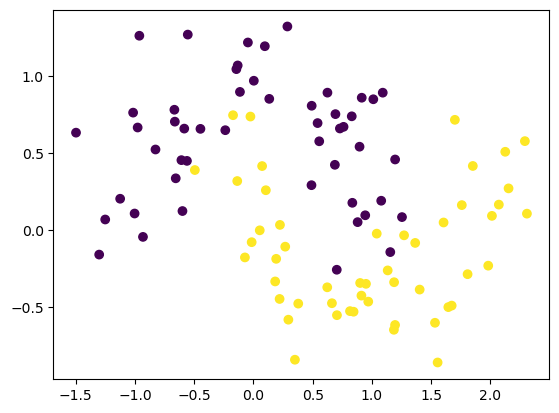

In [11]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [16]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
adam = Adam(learning_rate=0.01)

model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])

In [20]:
history = model.fit(X, y, epochs=2000, validation_split=0.2, verbose=0)

9600/9600 [==============================] - 38s 4ms/step


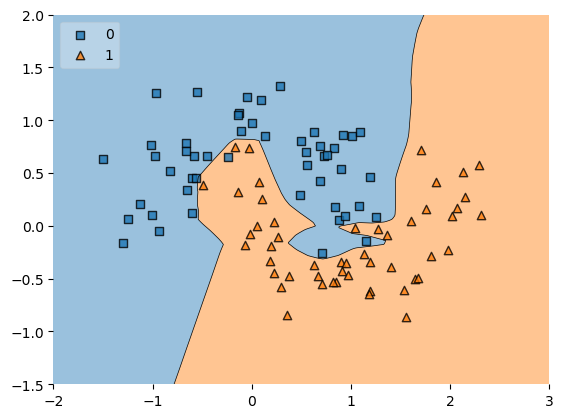

In [22]:
plot_decision_regions(X, y.astype("int"), clf=model, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()